In [165]:
import pandas as pd
import numpy as np 
import imblearn 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
import pickle
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, LogisticRegressionCV

In [166]:
"""Datos importantes"""

#Absolute Temperature (in K)
#Relative Luminosity (L/Lo)
#Relative Radius (R/Ro)
#Absolute Magnitude (Mv)
#Star Color (white,Red,Blue,Yellow,yellow-orange etc)
#Spectral Class (O,B,A,F,G,K,,M)
#Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)**
#Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
#Ro = 6.9551 x 10^8 m (Avg Radius of Sun)


#Brown Dwarf -> Star Type = 0
#Red Dwarf -> Star Type = 1
#White Dwarf-> Star Type = 2
#Main Sequence -> Star Type = 3
#Supergiant -> Star Type = 4
#Hypergiant -> Star Type = 5


'Datos importantes'

In [287]:
df = pd.read_csv('6 class csv.csv')
df.head(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [288]:
#Sin nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [289]:
#cambio color colum
df = df.rename(columns={'Star color':'stars_color'}) 

In [290]:
#veo valores de colum repetidos escritos diferentes
stars_color = pd.DataFrame(df['stars_color'].value_counts().sort_values(ascending=False))
stars_color

,stars_color
Red,112
Blue,55
Blue-white,26
Blue White,10
yellow-white,8
White,7
Blue white,3
Yellowish White,3
white,3
yellowish,2


In [291]:
#Cambio conmbres diferentes
df=df.replace({"Blue":"Blue", "Blue-white":"Blue White","Blue white":"Blue White","Blue white":"Blue White", "Blue-White":"Blue White","yellow-white":"Yellowish White", "white":"White", "White-Yellow":"Yellowish White", "yellowish":"Yellowish White", "Yellowish":"Yellowish White","Blue white":"Blue White", "Whitish":"White","Blue white":"Blue White"})

In [292]:
stars_color = pd.DataFrame(df['stars_color'].value_counts().sort_values(ascending=False))
stars_color

,stars_color
Red,112
Blue,55
Blue White,40
Yellowish White,15
White,12
Orange,2
Pale yellow orange,1
Blue,1
Orange-Red,1
Blue white,1


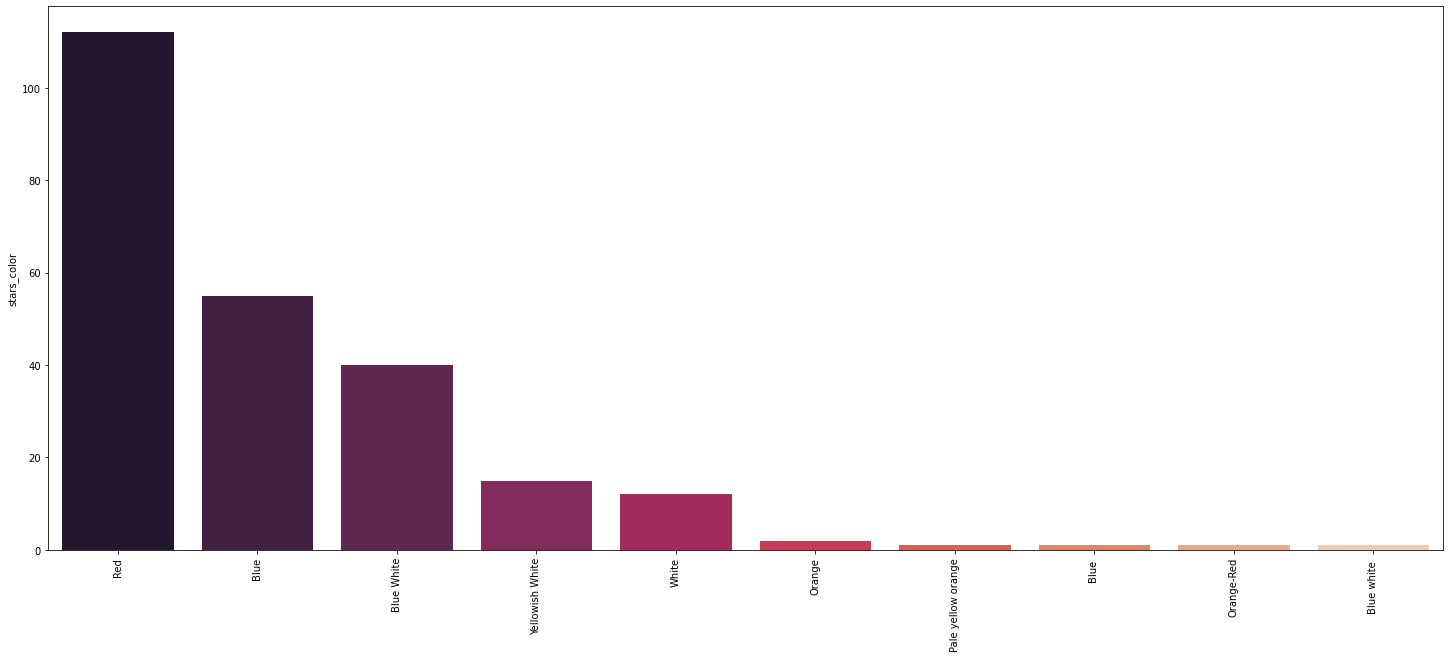

In [293]:
#grafico de barras colores estrellas
stars_color = pd.DataFrame(df['stars_color'].value_counts().sort_values(ascending=False))
plt.figure(figsize=(25,10))
ax = sns.barplot(x = stars_color.index, y = 'stars_color' , data = stars_color, palette='rocket')
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig("grafico")

In [294]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [295]:
#Hay luminocidades negativas...
dfff=df[df["Luminosity(L/Lo)"]<0]
dfff

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,stars_color,Spectral Class


In [296]:
#me aseguto que sean positivos

f1=lambda x: abs(x)
df["Temperature (K)"]=df["Temperature (K)"].apply(f1)
df["Luminosity(L/Lo)"]=df["Luminosity(L/Lo)"].apply(f1)
df["Radius(R/Ro)"]=df["Radius(R/Ro)"].apply(f1)


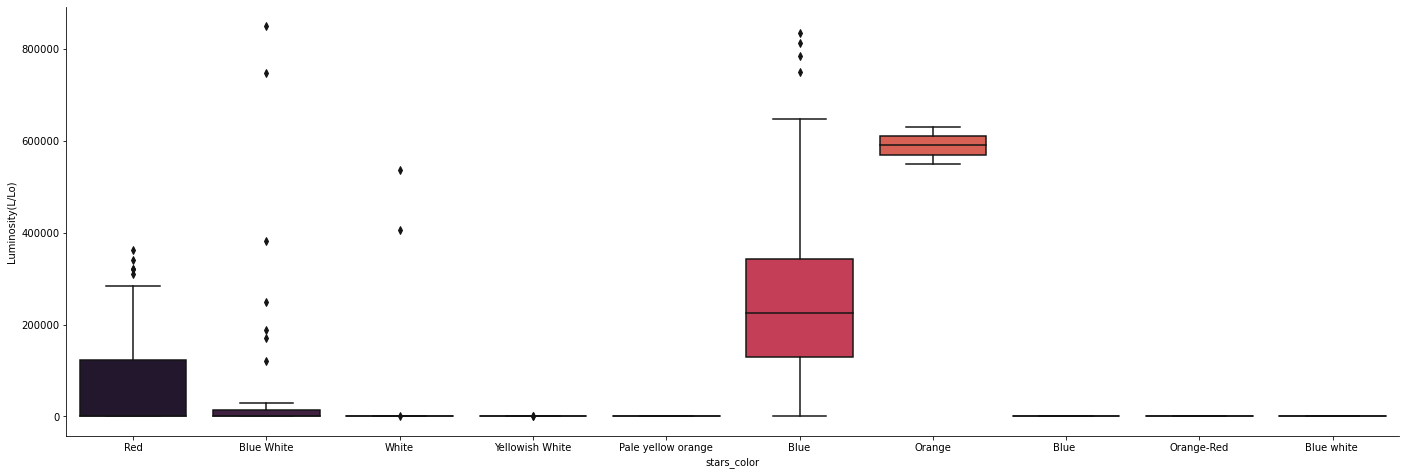

In [303]:
#ouliers luminocidad relativa
ax = sns.catplot(x = 'stars_color', y = 'Luminosity(L/Lo)', kind = "box", data = df, palette='rocket')
ax = ax.fig.set_size_inches(25, 7)

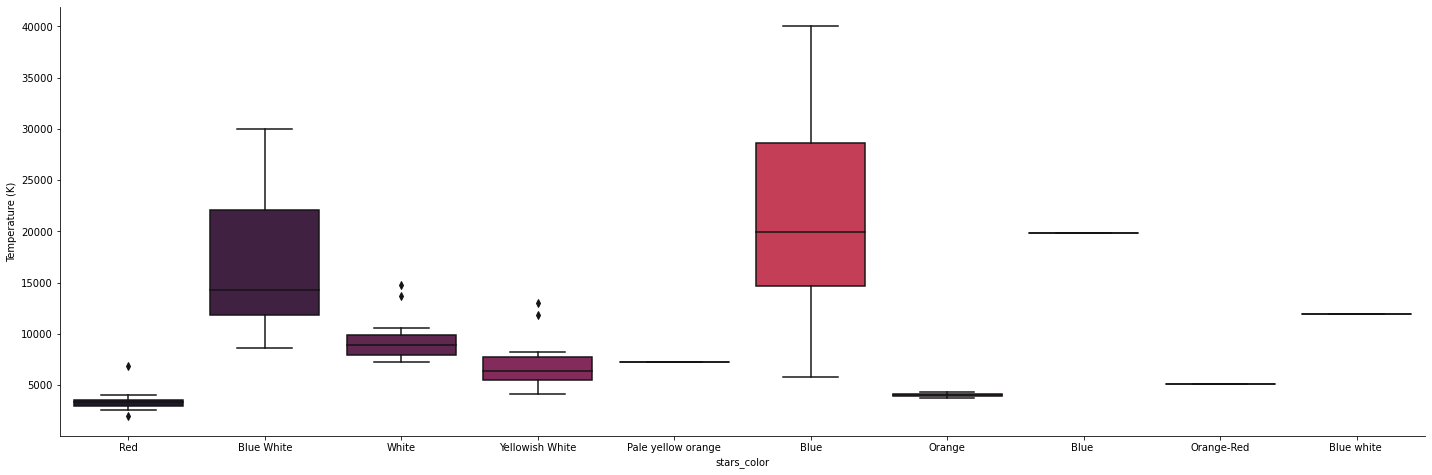

In [304]:
#ouliers temperatura
ax = sns.catplot(x = 'stars_color', y = "Temperature (K)", kind = "box", data = df, palette='rocket')
ax = ax.fig.set_size_inches(25, 7)

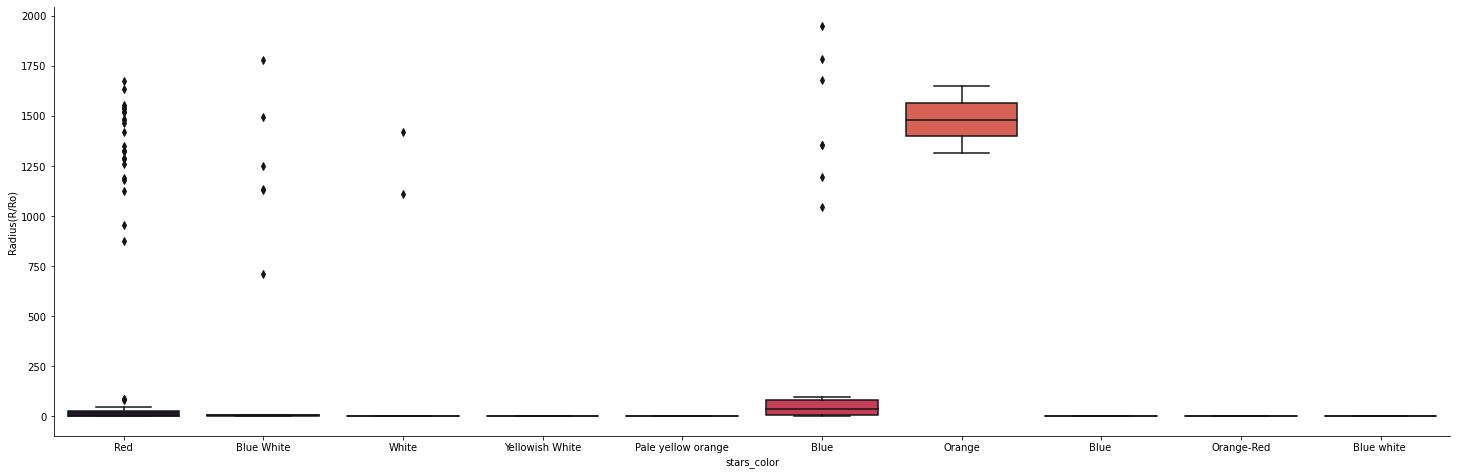

In [305]:
#ouliers radio relativo
ax = sns.catplot(x = 'stars_color', y = "Radius(R/Ro)", kind = "box", data = df, palette='rocket')
ax = ax.fig.set_size_inches(25, 7)

In [306]:
#Como hay mucho outlier, vamos a aplicar una tranformacion logaritmica

In [307]:
f=lambda x:  np.log(x)
df['Luminosity(L/Lo)']=df['Luminosity(L/Lo)'].apply(f)

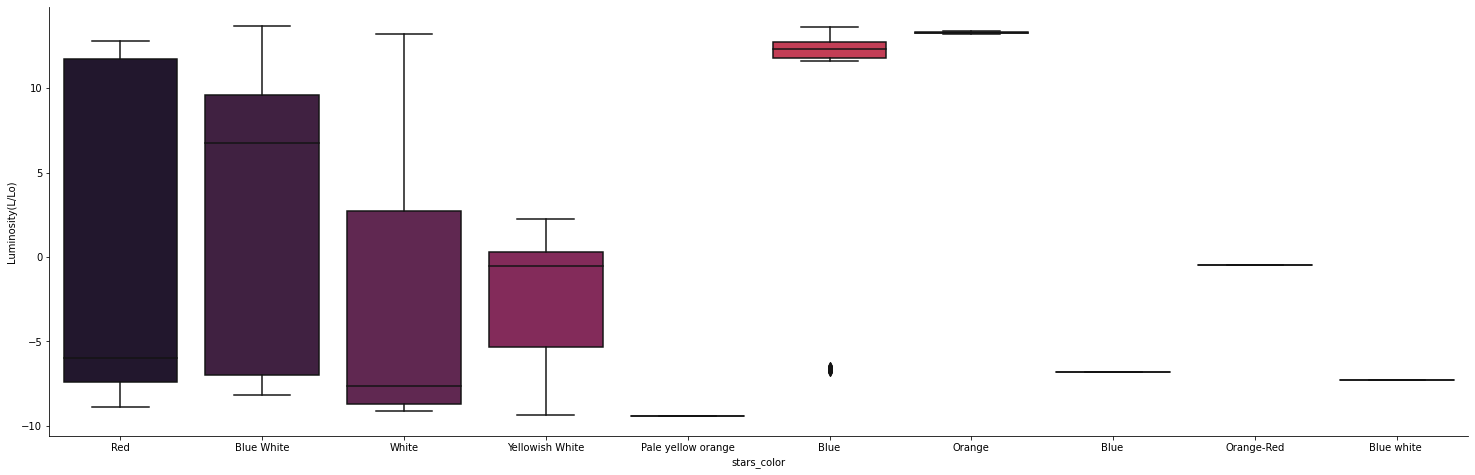

In [308]:
ax = sns.catplot(x = 'stars_color', y = 'Luminosity(L/Lo)', kind = "box", data = df, palette='rocket')
ax = ax.fig.set_size_inches(25, 7)

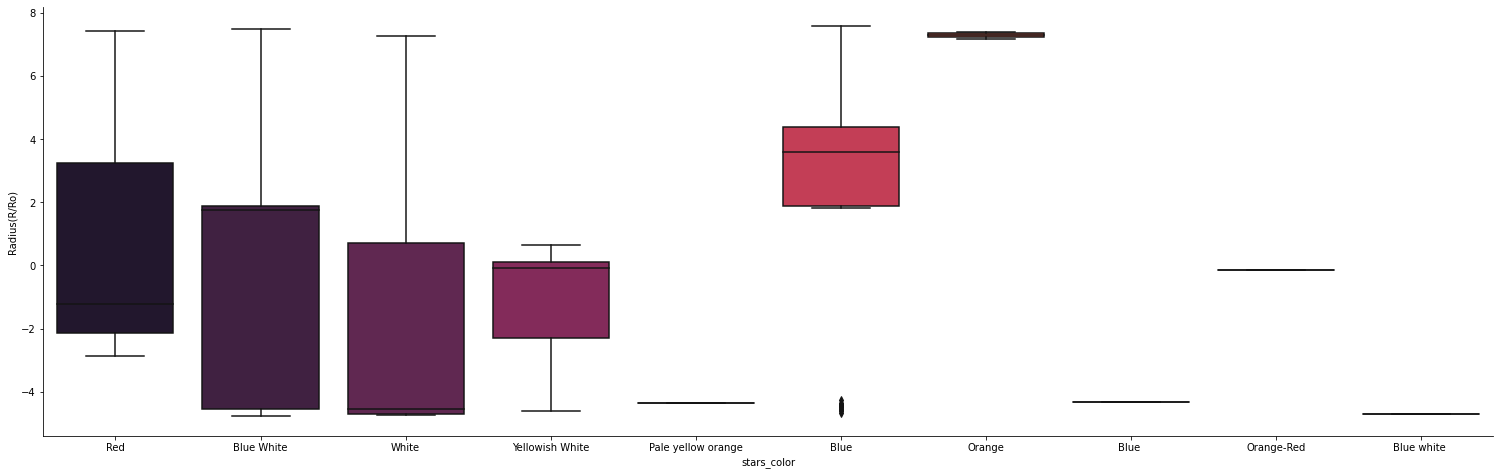

In [309]:
df["Radius(R/Ro)"]=df["Radius(R/Ro)"].apply(f)
ax = sns.catplot(x = 'stars_color', y = "Radius(R/Ro)", kind = "box", data = df, palette='rocket')
ax = ax.fig.set_size_inches(25, 7)

In [310]:
#crea un diccionario para luego codificar valores no numericos

df1 = {
    'temperature': df['Temperature (K)'],
    'Ln(luminosity)': df['Luminosity(L/Lo)'],
    'radius': df['Radius(R/Ro)'],
    'absolute_magnitude': df['Absolute magnitude(Mv)'],
    'star_color': df['stars_color'],
    'spectral_class': df['Spectral Class'],'star_type': df['Star type']}

df1 = pd.DataFrame.from_dict(df1)
df1['star_type'] = df1['star_type'].astype('category').cat.codes
df1['star_color'] = df1['star_color'].astype('category').cat.codes
df1['spectral_class'] = df1['spectral_class'].astype('category').cat.codes

In [311]:
df1.head(50)

,temperature,Ln(luminosity),radius,absolute_magnitude,star_color,spectral_class,star_type
0,3068,-6.032287,-1.771957,16.120,7,5,0
1,3042,-7.600902,-1.869505,16.600,7,5,0
2,2600,-8.111728,-2.282782,18.700,7,5,0
3,2800,-8.517193,-1.832581,16.650,7,5,0
4,1939,-8.888257,-2.273026,20.060,7,5,0
5,2840,-7.338538,-2.207275,16.980,7,5,0
6,2637,-7.222466,-2.063568,17.220,7,5,0
7,2600,-7.824046,-2.343407,17.400,7,5,0
8,2650,-7.278819,-2.207275,17.450,7,5,0
9,2700,-8.622554,-2.040221,16.050,7,5,0


In [312]:
"""Voy a desbalancear las clases intencionalmente"""
for i in range(12):
    df1=df1.drop([random.randint(0,150)],axis=0)

In [313]:
def split_data(df1):
    X = df1.loc[ : , df.columns != 'star_type']
    y = df1['star_type'].astype('int')
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

<AxesSubplot:>

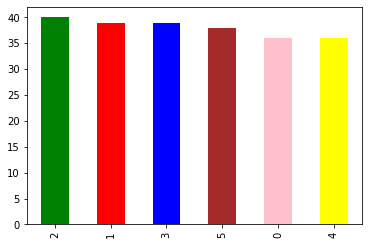

In [314]:
#Las clases estand esbalanceadas 
df1["star_type"].value_counts().plot.bar(color=['green', 'red', "blue", "brown", "pink", "yellow"])

<AxesSubplot:>

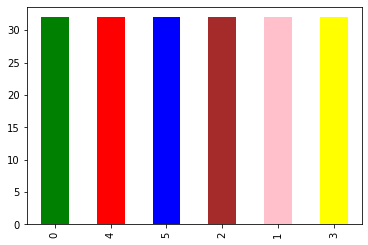

In [315]:
#balanceo usando smote

smote_sampler = SMOTE(random_state = 123)
X_train, X_test, y_train, y_test = split_data(df1)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
y_smo.value_counts().plot.bar(color=['green', 'red', "blue", "brown", "pink", "yellow"])

<AxesSubplot:>

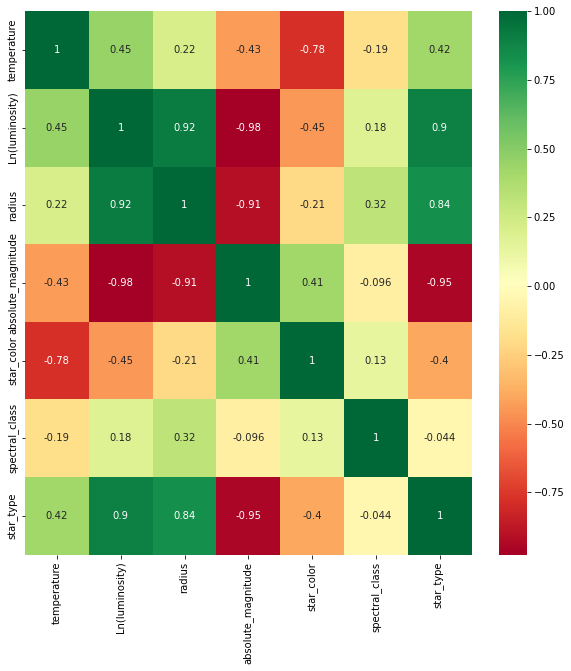

In [316]:
#Corelacion 
plt.figure(figsize=(10, 10)) 
sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn')

In [326]:
#Separo las caracteristicas mdel target
feature_cols = df1.columns[:-1]
correlacion = df1[feature_cols].corr()

In [327]:
#Veo que no esta escalada
df1.iloc[:, :-1].describe()

,temperature,Ln(luminosity),radius,absolute_magnitude,star_color,spectral_class
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,10696.899123,1.553440,0.662881,4.410855,4.587719,3.719298
std,9564.990669,9.108010,3.964788,10.428979,3.260527,2.113555
min,1939.000000,-9.433484,-4.779524,-11.920000,0.000000,0.000000
25%,3360.000000,-7.038446,-2.317450,-6.232500,2.000000,1.000000
50%,6803.500000,-3.063299,-0.353877,10.150000,7.000000,5.000000
75%,15857.500000,12.196022,3.760413,13.564250,7.000000,5.000000
max,40000.000000,13.652309,7.574815,20.060000,9.000000,6.000000


In [328]:
#uso StandardScaler para reescalar los datos
#Estandarice las características eliminando la media y escalando a la varianza de la unidad.

X_raw = df1.iloc[:, :-1] #caratcteristicas
y_raw = df1.iloc[:, -1:] #target
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

In [329]:
#Separacion en grupos train test
X_train, X_test, y_train, y_test = train_test_split(X, y_raw, test_size=0.2, stratify=y_raw, random_state = 123)

In [331]:
#reg_log usando funcion por defecto
%time lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 3 ms


C:\Users\cfzap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [332]:
#Reg_log con Cv y penalidad
%time lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', verbose=1, n_jobs=-1).fit(X_train, y_train)

C:\Users\cfzap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.


CPU times: total: 78.1 ms
Wall time: 1.37 s


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    1.2s finished


In [333]:
pickle.dump(lr_l1, open('Modelo_reg_log_Lasso.p', 'wb'))
LASSO = pickle.load(open('Modelo_reg_log_Lasso.p', 'rb'))

In [334]:
(lr_l1.predict(X_test)==LASSO.predict(X_test)).all()

True

In [335]:
%time lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', verbose=1, n_jobs=-1).fit(X_train, y_train)

C:\Users\cfzap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished


CPU times: total: 78.1 ms
Wall time: 195 ms


In [336]:
%time gs = GridSearchCV(LogisticRegression(max_iter=10000, tol=0.1), param_grid = {"C": np.logspace(-4,4,10)}, verbose=1, n_jobs=-1)

CPU times: total: 0 ns
Wall time: 1 ms


In [337]:
#parametros usando gridsearchsv
%time gs.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 125 ms
Wall time: 284 ms


C:\Users\cfzap\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=LogisticRegression(max_iter=10000, tol=0.1), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             verbose=1)

In [338]:
pickle.dump(lr_l2, open('Modelo_reg_log_Ridge.p', 'wb'))
pickle.dump(gs, open('Modelo_reg_log_GS.p', 'wb'))

In [339]:
LASSO = pickle.load(open('Modelo_reg_log_Lasso.p', 'rb'))
RIDGE = pickle.load(open('Modelo_reg_log_Ridge.p', 'rb'))
GS = pickle.load(open('Modelo_reg_log_GS.p', 'rb'))

In [340]:
#mejor parametro gs
GS.best_params_

{'C': 166.81005372000558}

In [341]:
#mejor parametro lasso
LASSO.C_

array([ 0.35938137, 21.5443469 ,  0.35938137, 21.5443469 , 21.5443469 ,
        0.04641589])

In [342]:
#mejor parametro ridge
RIDGE.C_

array([3.59381366e-01, 1.29154967e+03, 4.64158883e-02, 1.00000000e-04,
       1.66810054e+02, 2.78255940e+00])

In [343]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2', 'gs']
coeff_models = [lr, LASSO, RIDGE, GS]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.sample(10, random_state=12)

,lr,l1,l2,gs
38,0,0,3,1
42,1,5,3,3
7,3,3,3,3
37,2,2,2,2
32,4,4,4,4
23,5,5,5,5
15,4,4,4,4
30,4,4,4,4
17,0,0,0,0
29,2,2,2,2


In [344]:
y_prob.sample(15, random_state=12)

,lr,l1,l2,gs
38,0.443831,0.410077,0.328121,0.963053
42,0.396027,0.712831,0.574672,0.989825
7,0.701750,0.673319,0.511701,0.999999
37,0.593382,0.510607,0.520205,0.999994
32,0.722935,0.667153,0.557892,0.995543
23,0.719443,0.911724,0.609694,0.997505
15,0.478679,0.488452,0.585683,0.997571
30,0.852139,0.701804,0.600270,0.996483
17,0.605472,0.744646,0.451415,0.999944
29,0.612053,0.602443,0.472494,0.999984


In [345]:
#Metricas de error reg_log

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)
metrics

,lr,l1,l2,gs
precision,0.912655,0.915459,0.927724,0.980676
recall,0.913043,0.913043,0.913043,0.978261
fscore,0.911594,0.912847,0.914346,0.978064
accuracy,0.913043,0.913043,0.913043,0.978261
auc,0.948043,0.947706,0.947368,0.986842


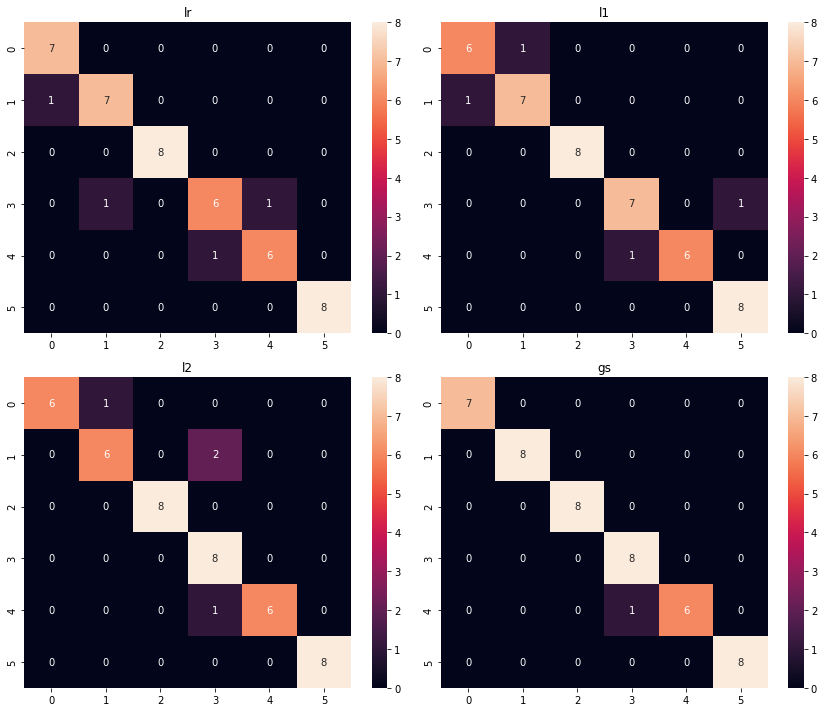

In [346]:
#Matrices de confucion Reg_log
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

#axList[-1].axis('off')

for ax,lab in zip(axList[:], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

# arbol

In [347]:
"""Arbol"""
# Construcción del método
# Train a decision tree with all default arguments
rs=123
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)

In [348]:
#metricas error
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [349]:
pd.Series(evaluate_metrics(y_test, preds))

accuracy     1.0
recall       1.0
precision    1.0
f1score      1.0
dtype: float64

# Los arboles de decision predicen un poco mejor los datos de entrenamiento que los datos de prueba, debido a que tienden al sobreajuste

In [350]:
"""otra forma"""


dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='micro'),
                      'recall': recall_score(y_true, y_pred, average='micro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [351]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0


In [352]:
### Encontrar los mejores parámetros, usando accuracy y busqueda exhaustiva
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [353]:
#mejores parametros
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(11, 3)

In [354]:
#Error trainig y test pero esta vez con los mejores parametros

y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)
train_test_gr_error

,train,test
accuracy,0.978022,0.956522
precision,0.978022,0.956522
recall,0.978022,0.956522
f1,0.978022,0.956522


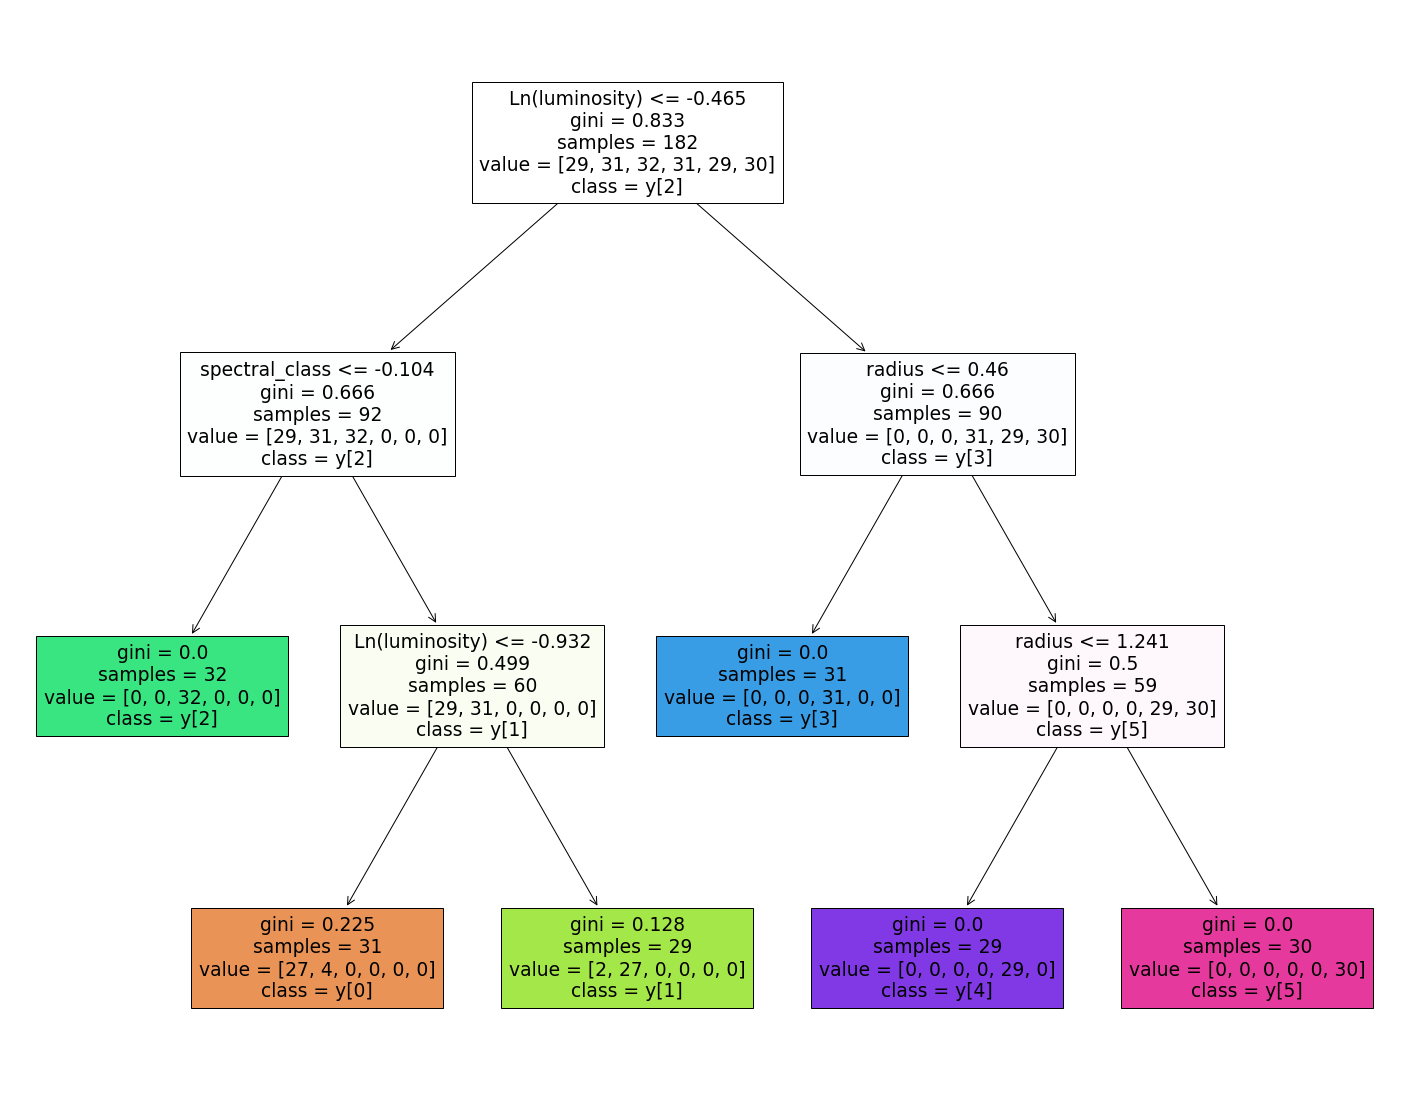

In [355]:
#Grafico del arbol
custom_model = DecisionTreeClassifier(**GR.best_params_)
custom_model.fit(X_train, y_train)
preds = custom_model.predict(X_test)



def plot_decision_tree(model, feature_names, nombre='Tree.png', dpi=1200):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True, class_names=True)
    plt.savefig(nombre, format=None, dpi=dpi)
    plt.show()
    
    
plot_decision_tree(custom_model, feature_cols, 'Arbol_C.jpg')